# Imports & globals

In [1]:
import sys
sys.path.append("/home/cbarkhof/fall-2021")

In [2]:
from analysis_run_postprocessing.general_postprocessing_steps import *

%config InlineBackend.figure_format='retina'
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

DEVICE = "cuda:0"
EXPORT_DIR = f"{CODE_DIR}/analysis_run_postprocessing/run_postprocess_files"
EVALUATION_RESULT_FILE = "evaluation-results.pt"
SURPRISAL_DATA_FILE = "surprisal_data.pt"

# Fetch relevant runs

In [3]:
# prefixes = ["(mdr-vae-exp 8 oct)", "(fb-vae-exp 8 oct) ", 
#             "(beta-vae-exp 6 oct) ", "(inf-vae-exp 5 oct) ", 
#             "(5-jan ptb-test)", "(4-jan ptb-test)", "(10-jan ptb)", "(11-jan ptb)"] #", "(19-jan ptb)"
# run_df = make_run_overview_df(prefixes)
# run_df = run_df[run_df.index.isin(df_all_select_image.index)]

run_df = pd.read_csv("final_selection_runs.csv", index_col=0)
print(len(run_df), len(run_df[run_df.image_or_language == "image"]), len(run_df[run_df.image_or_language == "language"]))
run_df.head()

71 48 23


,objective,l_rate,dataset,image_or_language,beta_beta,free_bits,mdr_value,l_mmd,decoder,run_name
INFO-VAE l_Rate 0.1 l_MMD 1 dec: CNN.T,INFO-VAE,0.1,bmnist,image,0.0,0,0,1,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=0.1, l_2..."
INFO-VAE l_Rate 0.1 l_MMD 1 dec: PixelCNN++,INFO-VAE,0.1,bmnist,image,0.0,0,0,1,cond_pixel_cnn_pp,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=0.1, l_2..."
INFO-VAE l_Rate 0.1 l_MMD 100 dec: CNN.T,INFO-VAE,0.1,bmnist,image,0.0,0,0,100,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=0.1, l_2..."
INFO-VAE l_Rate 0.1 l_MMD 100 dec: PixelCNN++,INFO-VAE,0.1,bmnist,image,0.0,0,0,100,cond_pixel_cnn_pp,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=0.1, l_2..."
INFO-VAE l_Rate 0.5 l_MMD 1 dec: CNN.T,INFO-VAE,0.5,bmnist,image,0.0,0,0,1,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=0.5, l_2..."


# Check whether there are evaluation results missing

In [19]:
missing_df = overview_of_missing_analysis(run_df)
missing_df.sum()

dir               0
surprisal_data    0
encode            0
samples           0
cond_samples      0
evaluation        0
dtype: int64

In [22]:
missing_df = run_df.join(missing_df, on="run_name")
missing_df.head()

,objective,l_rate,dataset,image_or_language,beta_beta,free_bits,mdr_value,l_mmd,decoder,run_name,dir,surprisal_data,encode,samples,cond_samples,evaluation
INFO-VAE l_Rate 0.1 l_MMD 1 dec: CNN.T,INFO-VAE,0.1,bmnist,image,0.0,0,0,1,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=0.1, l_2...",False,False,False,False,False,False
INFO-VAE l_Rate 0.1 l_MMD 1 dec: PixelCNN++,INFO-VAE,0.1,bmnist,image,0.0,0,0,1,cond_pixel_cnn_pp,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=0.1, l_2...",False,False,False,False,False,False
INFO-VAE l_Rate 0.1 l_MMD 100 dec: CNN.T,INFO-VAE,0.1,bmnist,image,0.0,0,0,100,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=0.1, l_2...",False,False,False,False,False,False
INFO-VAE l_Rate 0.1 l_MMD 100 dec: PixelCNN++,INFO-VAE,0.1,bmnist,image,0.0,0,0,100,cond_pixel_cnn_pp,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=0.1, l_2...",False,False,False,False,False,False
INFO-VAE l_Rate 0.5 l_MMD 1 dec: CNN.T,INFO-VAE,0.5,bmnist,image,0.0,0,0,1,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=0.5, l_2...",False,False,False,False,False,False


# Gather all the evaluation results

In [23]:
all_results = dict()

for idx, row in missing_df[missing_df.evaluation == False].iterrows():
    
    save_dir = f"{EXPORT_DIR}/{row.run_name}"
    result_file = f"{save_dir}/{EVALUATION_RESULT_FILE}"
    
    if os.path.exists(result_file):
        res = torch.load(result_file)
        
        for phase, phase_res in res.items():
            
            all_results[(idx, phase)] = dict()
            
            for k in sorted(list(phase_res.keys())):
                if " mean" in k:
                    var_name = k.split(" mean")[0]
                    
                    all_results[(idx, phase)][var_name] = phase_res[k]

# Re-compute PPL, made a mistake first
for idx, row in missing_df[missing_df.evaluation == False].iterrows():
    surprisal_d = torch.load(f"{EXPORT_DIR}/{row.run_name}/{SURPRISAL_DATA_FILE}")
    
    for phase in ["train", "valid", "test"]:
        if phase in surprisal_d:
            surprisal = surprisal_d[phase]

            iw_lls = np.array(surprisal["iw_lls"])
            lens = np.array(surprisal["lens"])

            perplexity = np.exp(- iw_lls.mean() / (lens.mean()+2))

            all_results[(idx, phase)]["PPL"] = perplexity
                    
results_df = pd.DataFrame(all_results).transpose()
results_df = results_df.reset_index(level=1).rename({"level_1":"phase"}, axis=1)
results_df.head()

/home/cbarkhof/.conda/envs/thesisenv/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: Mean of empty slice.
/home/cbarkhof/.conda/envs/thesisenv/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,phase,IW LL,MMD,PPL,distortion,elbo,kl_prior_post,mean_mean,mean_scale,std_across_x_mean,std_across_x_scale,std_across_z_mean,std_across_z_scale
INFO-VAE l_Rate 0.1 l_MMD 1 dec: CNN.T,test,-101.848379,0.112477,NaN,67.340919,-105.260177,37.919259,0.184871,0.036949,1.313261,0.008951,1.334510,0.008604
INFO-VAE l_Rate 0.1 l_MMD 1 dec: CNN.T,valid,-102.698863,0.109114,NaN,67.664685,-105.651187,37.986501,0.170109,0.036762,1.317382,0.008915,1.338601,0.008571
INFO-VAE l_Rate 0.1 l_MMD 1 dec: CNN.T,train,NaN,0.111386,NaN,62.173378,-100.287820,38.114442,0.169685,0.036772,1.328153,0.008922,1.346279,0.008638
INFO-VAE l_Rate 0.1 l_MMD 1 dec: PixelCNN++,test,-93.793252,0.068362,NaN,50.196447,-96.392718,46.196270,-0.141036,0.013599,1.167017,0.002962,1.185118,0.004405
INFO-VAE l_Rate 0.1 l_MMD 1 dec: PixelCNN++,valid,-92.494255,0.063386,NaN,50.566032,-96.655054,46.089022,-0.133279,0.013563,1.163724,0.002922,1.172160,0.004379


# Merge with the hyper parameters

In [24]:
results_df['hyper params'] = results_df.index.map(run_df.transpose().to_dict())
results_df = pd.concat([results_df, results_df['hyper params'].apply(pd.Series)], axis=1)
results_df.head()

,phase,IW LL,MMD,PPL,distortion,elbo,kl_prior_post,mean_mean,mean_scale,std_across_x_mean,...,objective,l_rate,dataset,image_or_language,beta_beta,free_bits,mdr_value,l_mmd,decoder,run_name
INFO-VAE l_Rate 0.1 l_MMD 1 dec: CNN.T,test,-101.848379,0.112477,NaN,67.340919,-105.260177,37.919259,0.184871,0.036949,1.313261,...,INFO-VAE,0.1,bmnist,image,0.0,0,0,1,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=0.1, l_2..."
INFO-VAE l_Rate 0.1 l_MMD 1 dec: CNN.T,valid,-102.698863,0.109114,NaN,67.664685,-105.651187,37.986501,0.170109,0.036762,1.317382,...,INFO-VAE,0.1,bmnist,image,0.0,0,0,1,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=0.1, l_2..."
INFO-VAE l_Rate 0.1 l_MMD 1 dec: CNN.T,train,NaN,0.111386,NaN,62.173378,-100.287820,38.114442,0.169685,0.036772,1.328153,...,INFO-VAE,0.1,bmnist,image,0.0,0,0,1,basic_deconv_decoder,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=0.1, l_2..."
INFO-VAE l_Rate 0.1 l_MMD 1 dec: PixelCNN++,test,-93.793252,0.068362,NaN,50.196447,-96.392718,46.196270,-0.141036,0.013599,1.167017,...,INFO-VAE,0.1,bmnist,image,0.0,0,0,1,cond_pixel_cnn_pp,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=0.1, l_2..."
INFO-VAE l_Rate 0.1 l_MMD 1 dec: PixelCNN++,valid,-92.494255,0.063386,NaN,50.566032,-96.655054,46.089022,-0.133279,0.013563,1.163724,...,INFO-VAE,0.1,bmnist,image,0.0,0,0,1,cond_pixel_cnn_pp,"(inf-vae-exp 5 oct) INFO-VAE[l_1_rate=0.1, l_2..."


In [25]:
results_df.to_csv("global_stats.csv")

# Columns present to plot

In [26]:
for i, c in enumerate(results_df.columns):
    print(i, c)

0 phase
1 IW LL
2 MMD
3 PPL
4 distortion
5 elbo
6 kl_prior_post
7 mean_mean
8 mean_scale
9 std_across_x_mean
10 std_across_x_scale
11 std_across_z_mean
12 std_across_z_scale
13 hyper params
14 objective
15 l_rate
16 dataset
17 image_or_language
18 beta_beta
19 free_bits
20 mdr_value
21 l_mmd
22 decoder
23 run_name


In [27]:
stats = ['IW LL', 'MMD', 'PPL', 'distortion', 'elbo', 'kl_prior_post', 'mean_mean', 'mean_scale']

pd.set_option('display.max_rows', 100)
summary_df = results_df[results_df.phase == "valid"].groupby("image_or_language")[stats].describe().transpose()
summary_df.reset_index().to_csv("summary_results.csv")
summary_df

image_or_language         image     language
IW LL         count   48.000000    21.000000
              mean   -88.379186  -103.529181
              std      8.537639    35.835341
              min   -123.197164  -253.314281
              25%    -91.147690   -97.404880
              50%    -89.695821   -91.553186
              75%    -81.111449   -89.628737
              max    -78.864767   -86.616172
MMD           count   48.000000    21.000000
              mean     0.015464     0.000435
              std      0.028910     0.000916
              min     -0.000073    -0.000010
              25%      0.000615     0.000011
              50%      0.003398     0.000085
              75%      0.013101     0.000433
              max      0.131946     0.004164
PPL           count    0.000000    21.000000
              mean          NaN   411.084921
              std           NaN  1742.475999
              min           NaN    22.179813
              25%           NaN    23.149450
              50%           NaN    23.829907
              75%           NaN    32.035970
              max           NaN  8015.650256
distortion    count   48.000000    21.000000
              mean    75.114270    82.083411
              std     14.652013    10.079784
              min     50.566032    62.263308
              25%     68.468794    72.998246
              50%     72.777758    86.942798
              75%     80.680995    90.209807
              max    138.613875    90.595041
elbo          count   48.000000    21.000000
              mean   -91.536237  -105.943426
              std     11.943109    37.733606
              min   -142.718315  -262.025460
              25%    -95.347380  -103.308794
              50%    -93.092958   -91.300843
              75%    -80.805720   -90.435861
              max    -80.548312   -89.988720
kl_prior_post count   48.000000    21.000000
              mean    16.421967    23.860016
              std     13.424062    45.360234
              min      0.000043     0.000963
              25%      0.009434     0.004226
              50%     17.489492     4.467635
              75%     25.632532    30.310549
              max     46.089022   199.762152
mean_mean     count   48.000000    21.000000
              mean     0.004264     0.001184
              std      0.041798     0.012436
              min     -0.133279    -0.024109
              25%     -0.003558    -0.001075
              50%      0.000461     0.000451
              75%      0.005797     0.003872
              max      0.170109     0.024210
mean_scale    count   48.000000    21.000000
              mean     0.421869     0.723276
              std      0.392415     0.341703
              min      0.013563     0.004218
              25%      0.094193     0.470923
              50%      0.225870     0.895992
              75%      0.985855     0.992656
              max      1.025796     0.996491

# Plots

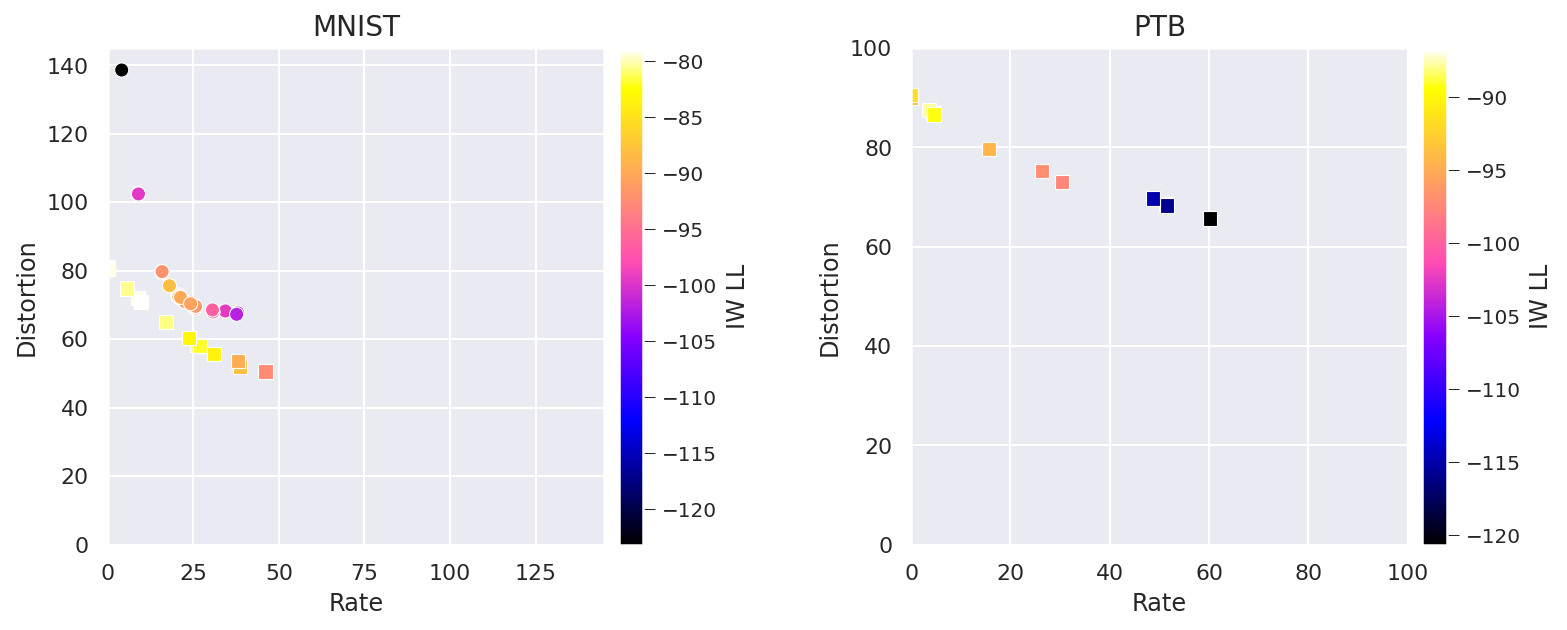

In [96]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

data = results_df[(results_df.phase == "valid") & (results_df.kl_prior_post < 150)]

markers = {
    'basic_deconv_decoder': "o",
    'cond_pixel_cnn_pp': "s",
    'strong_distil_roberta_decoder': "s"
}

fig, axs = plt.subplots(ncols=2, figsize=(12, 5)) # gridspec_kw={'width_ratios': [1, 0.1, 1, 0.1]}

for i, (group_name, group_df) in enumerate(data.groupby("image_or_language")):
    
    if group_name == "language":
        axs[i].set_title("PTB", size=14)
    else:
        axs[i].set_title("MNIST", size=14)
        
    sns.scatterplot(
        x="kl_prior_post", 
        y="distortion", 
        hue="IW LL", 
        markers=markers,
        palette="gnuplot2",
        style="decoder",
        s=50.,
        ax=axs[i],
        data=group_df)
    
    axs[i].legend()
    axs[i].set_xlabel("Rate")
    axs[i].set_ylabel("Distortion")
    
    if group_name == "language":
        upper_lim = 100
    else:
        upper_lim = 145
        
    axs[i].set_xlim([0, upper_lim])
    axs[i].set_ylim([0, upper_lim])
        
    axs[i].set_aspect("equal")

    norm = plt.Normalize(group_df['IW LL'].min(), group_df['IW LL'].max())
    sm = plt.cm.ScalarMappable(cmap="gnuplot2", norm=norm)
    sm.set_array([])

    # Remove the legend and add a colorbar
    axs[i].get_legend().remove()
    
    #fig.colorbar(sm, cax=axs[i*2+1], orientation='vertical')
    #axs[i*].tick_params(labelsize=8)
    
    divider = make_axes_locatable(axs[i])
    cax = divider.append_axes('right', size='5%', pad=0.1)
    cax.tick_params(labelsize=10, width=0.5)
    
    fig.colorbar(sm, cax=cax, orientation='vertical')
    cax.set_ylabel("IW LL", size=12)
    
fig.subplots_adjust(wspace=0.5)

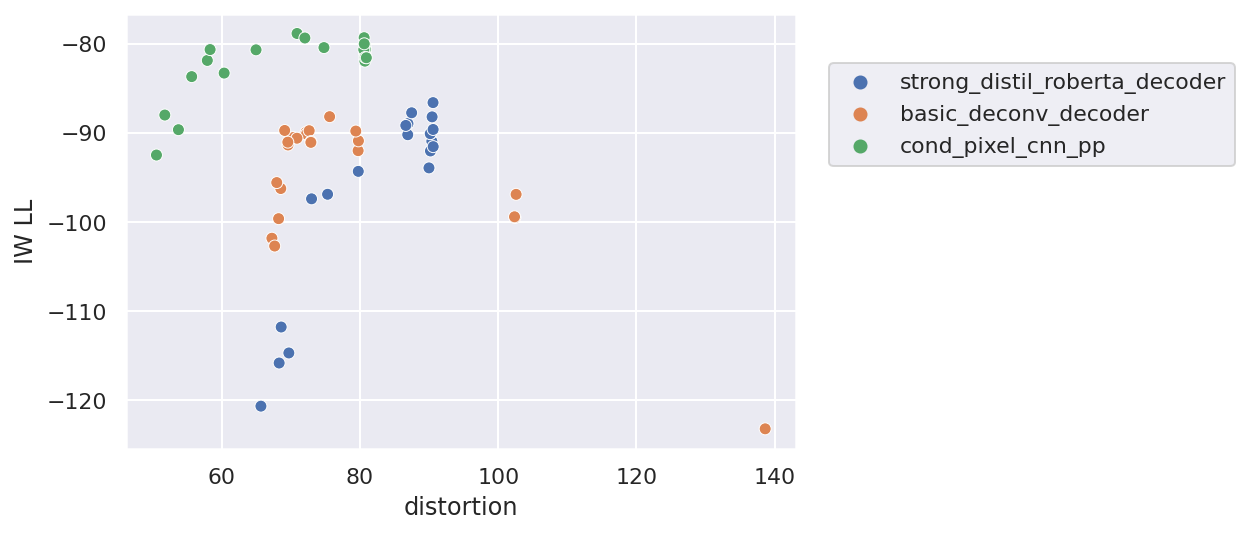

In [23]:
data = results_df[(results_df.phase == "valid") & (results_df["IW LL"] > -200)]

sns.scatterplot(
    x="distortion", 
    y="IW LL", 
    hue="decoder", 
    data=data) 

plt.legend(loc=(1.05, 0.65))

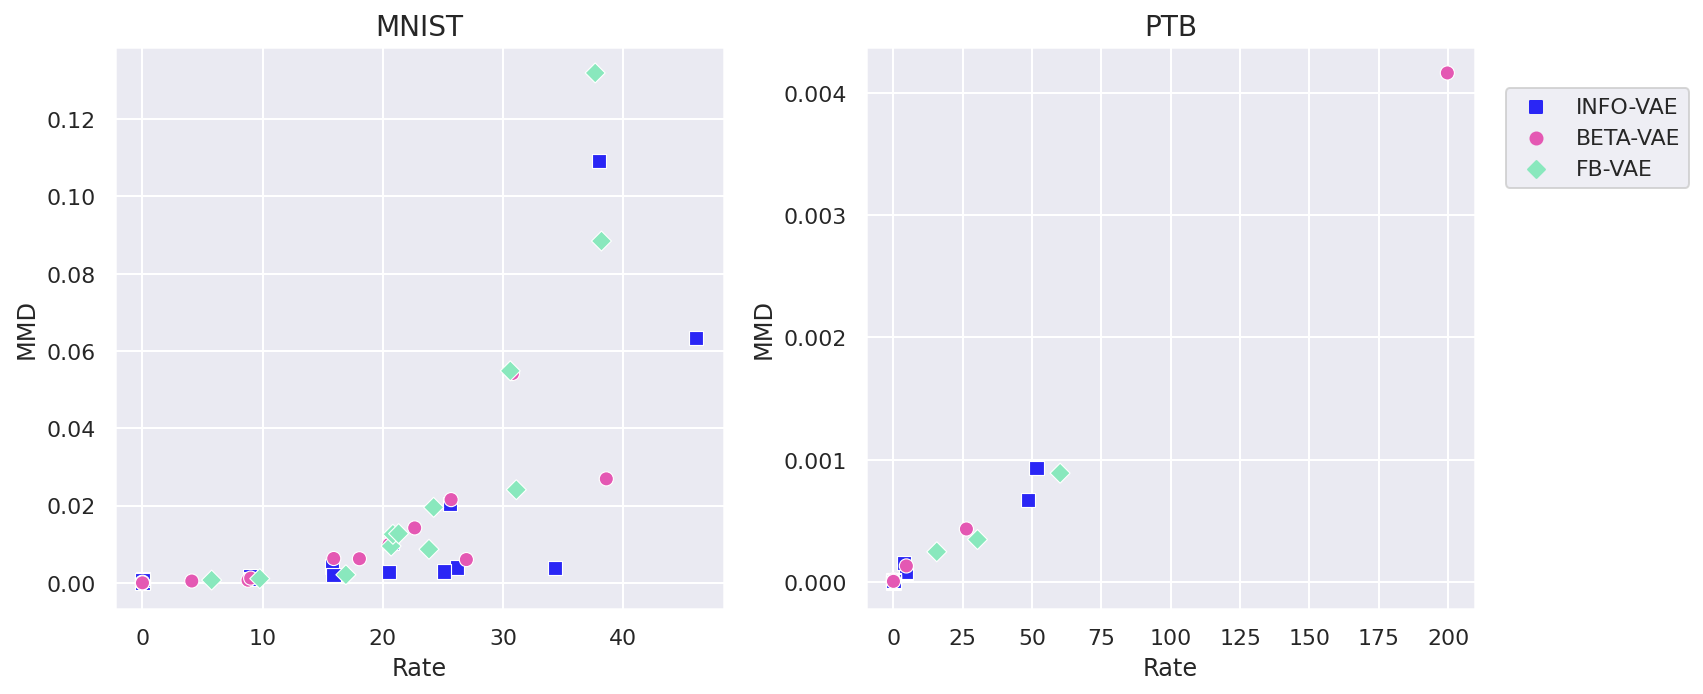

In [111]:
data = results_df[(results_df.phase == "valid")]

palette_dict = {
    "INFO-VAE": "#2A26F5",
    "BETA-VAE": "#E458B3",
    "FB-VAE": "#89E8BD"
}

marker_dict = {
    "INFO-VAE": "s",
    "BETA-VAE": "o",
    "FB-VAE": "D"
}

fig, axs = plt.subplots(ncols=2, figsize=(12, 5))
for i, group_name in enumerate(["image", "language"]):
    data_select = data[data.image_or_language == group_name]
    sns.scatterplot(
        x="kl_prior_post", 
        y="MMD", 
        hue="objective",
        s=50,
        style="objective",
        markers=marker_dict,
        palette=palette_dict,
        data=data_select,
        ax=axs[i])
    
    axs[i].set_ylabel("MMD", size=12)
    axs[i].set_xlabel("Rate", size=12)
    
    if group_name == "language":
        axs[i].set_title("PTB", size=14)
    else:
        axs[i].set_title("MNIST", size=14)
    
    if i == 0:
        axs[i].legend().remove()
    else:
        axs[i].legend(loc=(1.05, 0.75))
    
plt.tight_layout()

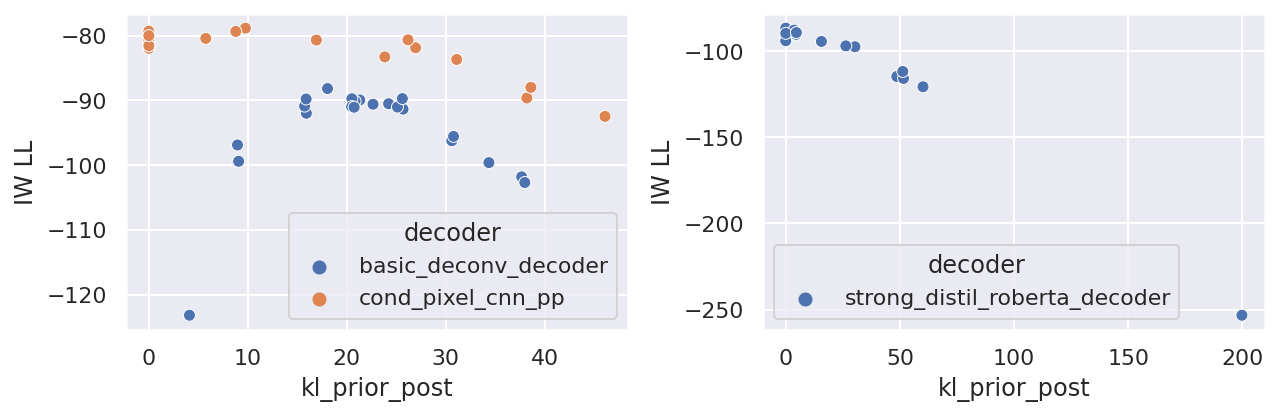

In [34]:
data = results_df[(results_df.phase == "valid")]

fig, axs = plt.subplots(ncols=2, figsize=(9, 3))
for i, group_name in enumerate(["image", "language"]):
    data_select = data[data.image_or_language == group_name]
    sns.scatterplot(
        x="kl_prior_post", 
        y="IW LL", 
        hue="decoder",
        data=data_select,
        ax=axs[i])
    
plt.tight_layout()